In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [7]:
data['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
D              3
F2             3
E101           3
F33            3
D26            2
E67            2
B20            2
C124           2
C52            2
B5             2
B22            2
C126           2
B49            2
C83            2
F4             2
D36            2
C2             2
C123           2
E33            2
D17            2
E121           2
C68            2
B35            2
C92            2
F G73          2
D33            2
              ..
E38            1
D37            1
D48            1
C50            1
C95            1
B4             1
T              1
B101           1
C82            1
C148           1
C128           1
B50            1
A34            1
C118           1
C32            1
A19            1
E46            1
C99            1
D15            1
C111           1
D30            1
A5             1
D19            1
C91            1
B19            1
B79            1
E36            1
D50           

In [8]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

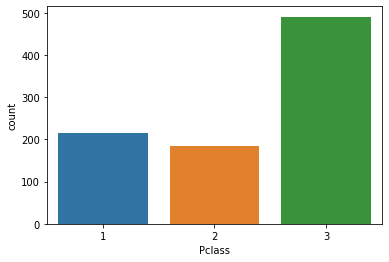

In [9]:
sns.countplot(x=data.Pclass)

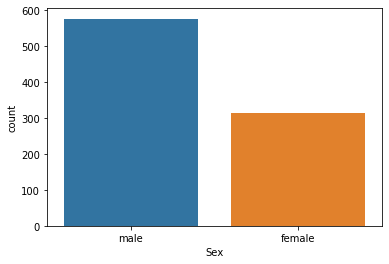

In [10]:
sns.countplot(x=data.Sex)

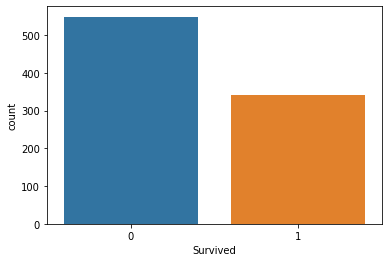

In [11]:
sns.countplot(x=data.Survived)

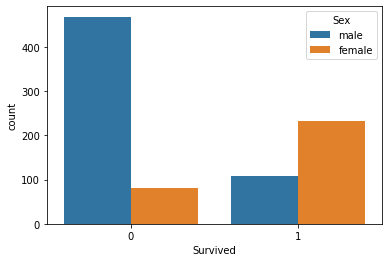

In [12]:
sns.countplot(x='Survived',hue='Sex',data=data)

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

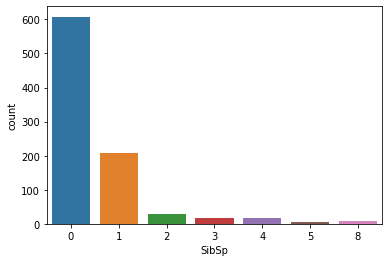

In [14]:
sns.countplot(x=data.SibSp)

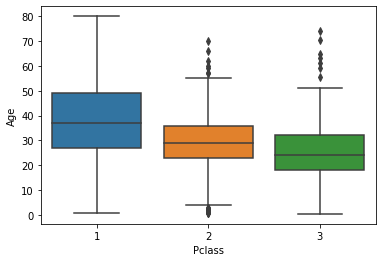

In [15]:
sns.boxplot(x='Pclass',y='Age',data=data,width=0.8)

In [16]:
def age(col):
    age=col[0]
    pclass=col[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else:
            return 25
    else:
        return age

In [17]:
data['Age']=data[['Age','Pclass']].apply(age,axis=1)

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data.drop(columns='Cabin',inplace=True)

In [20]:
data['Embarked'].mode()

0    S
dtype: object

In [21]:
data['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.527097
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [23]:
data.SibSp=np.log1p(data.SibSp)

In [24]:
data.Parch=np.log1p(data.Parch)

In [25]:
data.Fare=np.log1p(data.Fare)

In [26]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.527097
SibSp          1.661245
Parch          1.675439
Fare           0.394928
dtype: float64

In [27]:
data_new=pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)
data_new.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,0.693147,0.0,A/5 21171,2.110213,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,0.693147,0.0,PC 17599,4.280593,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0.000000,0.0,STON/O2. 3101282,2.188856,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,0.693147,0.0,113803,3.990834,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0.000000,0.0,373450,2.202765,1,0,1


In [28]:
data_new=data_new.drop(['Name','Ticket'],axis=1)

In [29]:
data_new.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.527097
SibSp          1.661245
Parch          1.675439
Fare           0.394928
Sex_male      -0.618921
Embarked_Q     2.948778
Embarked_S    -0.997083
dtype: float64

In [30]:
X=data_new.drop(columns=['Survived'],axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,0.693147,0.0,2.110213,1,0,1
1,2,1,38.0,0.693147,0.0,4.280593,0,0,0
2,3,3,26.0,0.000000,0.0,2.188856,0,0,1
3,4,1,35.0,0.693147,0.0,3.990834,0,0,1
4,5,3,35.0,0.000000,0.0,2.202765,1,0,1


In [31]:
Y=data_new['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,random_state=0,test_size=0.33,stratify=Y)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)


In [34]:
train_y=y_train

In [35]:
train_x=pd.DataFrame(data=X_train,columns=x_train.columns)
train_x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.764715,-1.540481,1.458026,0.921945,-0.518494,1.383502,0.729475,-0.292592,-1.643735
1,0.622926,-0.348109,-0.538387,0.921945,2.260738,0.781770,-1.370849,-0.292592,-1.643735
2,0.147743,-1.540481,-0.308032,0.921945,-0.518494,1.552882,0.729475,-0.292592,-1.643735
3,-1.086202,0.844263,-0.231247,-0.598714,-0.518494,-0.797339,0.729475,-0.292592,0.608371
4,-1.277809,0.844263,-0.538387,-0.598714,-0.518494,-0.766488,0.729475,-0.292592,0.608371


In [36]:
test_x=pd.DataFrame(data=X_test,columns=x_test.columns)
test_x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.496466,0.844263,-0.768743,-0.598714,-0.518494,-0.228532,0.729475,-0.292592,0.608371
1,-1.649525,-0.348109,1.995522,-0.598714,-0.518494,-0.136179,-1.370849,-0.292592,0.608371
2,-1.480911,0.844263,-1.383024,3.332132,2.260738,0.899494,0.729475,-0.292592,0.608371
3,-0.384923,-0.348109,-0.384817,-0.598714,-0.518494,-0.330292,-1.370849,-0.292592,0.608371
4,-1.312298,0.844263,0.306249,-0.598714,-0.518494,-0.701874,0.729475,-0.292592,0.608371


In [37]:
train_x.skew()

PassengerId   -0.006466
Pclass        -0.593079
Age            0.513147
SibSp          1.687785
Parch          1.701020
Fare           0.407666
Sex_male      -0.642993
Embarked_Q     3.133024
Embarked_S    -1.037978
dtype: float64

In [38]:
train_x.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [39]:
train_x.shape,train_y.shape

((596, 9), (596,))

In [40]:
test_x.shape,y_test.shape

((295, 9), (295,))

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy=0
for i in range(5,100):
    x_train,x_test,y_train,y_test=tts(train_x,train_y,test_size=0.2,random_state=i,stratify=train_y)
    lr.fit(x_train,y_train)
    pred_y=lr.predict(x_test)
    acc_score=accuracy_score(y_test,pred_y)
    print('Accuracy score is',acc_score,'at random state',i)
    if acc_score>accuracy:
        accuracy=acc_score
        final_state=i
print('max accuracy score is ',accuracy,'at random state',final_state)
    

Accuracy score is 0.775 at random state 5
Accuracy score is 0.7833333333333333 at random state 6
Accuracy score is 0.825 at random state 7
Accuracy score is 0.75 at random state 8
Accuracy score is 0.775 at random state 9
Accuracy score is 0.75 at random state 10
Accuracy score is 0.7833333333333333 at random state 11
Accuracy score is 0.7916666666666666 at random state 12
Accuracy score is 0.775 at random state 13
Accuracy score is 0.775 at random state 14
Accuracy score is 0.825 at random state 15
Accuracy score is 0.7833333333333333 at random state 16
Accuracy score is 0.7666666666666667 at random state 17
Accuracy score is 0.7833333333333333 at random state 18
Accuracy score is 0.7416666666666667 at random state 19
Accuracy score is 0.8 at random state 20
Accuracy score is 0.775 at random state 21
Accuracy score is 0.7583333333333333 at random state 22
Accuracy score is 0.775 at random state 23
Accuracy score is 0.7833333333333333 at random state 24
Accuracy score is 0.775 at rando

In [44]:
x_train,x_test,y_train,y_test=tts(train_x,train_y,test_size=0.2,random_state=26,stratify=train_y)
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
train_pred=lr.predict(x_train)
acc_score=accuracy_score(y_test,pred_y)

In [45]:
acc_score

0.8583333333333333

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
lr_test_auc=roc_auc_score(y_test,pred_y)
lr_train_auc=roc_auc_score(y_train,train_pred)

In [48]:
lr_test_auc,lr_train_auc

(0.8522326674500589, 0.7568865514090154)

In [49]:
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr_test_probs[:,1]
lr_train_probs=lr_train_probs[:,1]

In [50]:
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)

No handles with labels found to put in legend.


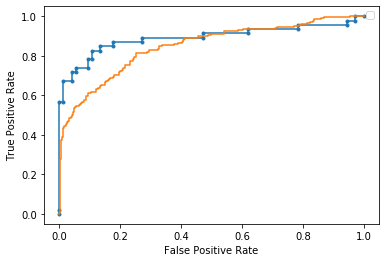

In [51]:
plt.plot(lr_test_fpr,lr_test_tpr,marker='.')
plt.plot(lr_train_fpr,lr_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_y)
confusion

array([[65,  9],
       [ 8, 38]], dtype=int64)

In [53]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,pred_y)
confusion,accuracy

(array([[65,  9],
        [ 8, 38]], dtype=int64), 0.8166666666666667)

In [54]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [55]:
accuracy=grid_search.best_score_
accuracy

0.7878151260504201

In [56]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [57]:
classifier=SVC(kernel='rbf',gamma=0.1,C=1,random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
train_pred=classifier.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,pred_y)
confusion,accuracy

(array([[65,  9],
        [ 8, 38]], dtype=int64), 0.8583333333333333)

In [58]:
svc_test_auc=roc_auc_score(y_test,y_pred)
svc_train_auc=roc_auc_score(y_train,train_pred)
svc_test_auc,svc_train_auc

(0.8398942420681551, 0.80433241947817)

In [59]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(n_estimators=10,criterion='entropy',max_depth=4)
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm=confusion_matrix(y_test,y_pred)
cm

0.8583333333333333


array([[67,  7],
       [10, 36]], dtype=int64)

In [60]:
from sklearn.ensemble import RandomForestClassifier as RFC
max_score=0
for i in range(0,100):
    from sklearn.ensemble import RandomForestClassifier as RFC
    RFC=RFC(n_estimators=15,criterion='entropy',max_depth=4,random_state=i)
    RFC.fit(x_train,y_train)
    y_pred=RFC.predict(x_test)
    train_pred=RFC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    print('Accuracy at random state',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('Max score is:',max_score,'at',final_state)


Accuracy at random state 0 is 0.8666666666666667
Accuracy at random state 1 is 0.875
Accuracy at random state 2 is 0.8666666666666667
Accuracy at random state 3 is 0.8583333333333333
Accuracy at random state 4 is 0.8833333333333333
Accuracy at random state 5 is 0.8333333333333334
Accuracy at random state 6 is 0.8583333333333333
Accuracy at random state 7 is 0.8333333333333334
Accuracy at random state 8 is 0.85
Accuracy at random state 9 is 0.8666666666666667
Accuracy at random state 10 is 0.8583333333333333
Accuracy at random state 11 is 0.875
Accuracy at random state 12 is 0.875
Accuracy at random state 13 is 0.875
Accuracy at random state 14 is 0.85
Accuracy at random state 15 is 0.85
Accuracy at random state 16 is 0.8666666666666667
Accuracy at random state 17 is 0.8416666666666667
Accuracy at random state 18 is 0.8583333333333333
Accuracy at random state 19 is 0.8416666666666667
Accuracy at random state 20 is 0.85
Accuracy at random state 21 is 0.85
Accuracy at random state 22 is 0

In [61]:
rfc_test_auc=roc_auc_score(y_test,y_pred)
rfc_train_auc=roc_auc_score(y_train,train_pred)
rfc_test_auc,rfc_train_auc

(0.8249118683901293, 0.8179842966112759)

In [62]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(n_estimators=15,max_depth=4,criterion='entropy',random_state=28)
for i in range(0,100):
    from sklearn.ensemble import AdaBoostClassifier as ABC
    ABC=ABC(base_estimator=RFC,learning_rate=0.1,random_state=i)
    ABC.fit(x_train,y_train)
    y_pred=ABC.predict(x_test)
    train_pred=ABC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy at :',i,'is:',accuracy)



accuracy at : 0 is: 0.8583333333333333
accuracy at : 1 is: 0.8666666666666667
accuracy at : 2 is: 0.875
accuracy at : 3 is: 0.8666666666666667
accuracy at : 4 is: 0.875
accuracy at : 5 is: 0.8666666666666667
accuracy at : 6 is: 0.875
accuracy at : 7 is: 0.8666666666666667
accuracy at : 8 is: 0.8583333333333333
accuracy at : 9 is: 0.8666666666666667
accuracy at : 10 is: 0.875
accuracy at : 11 is: 0.8583333333333333
accuracy at : 12 is: 0.85
accuracy at : 13 is: 0.8583333333333333
accuracy at : 14 is: 0.8666666666666667
accuracy at : 15 is: 0.8666666666666667
accuracy at : 16 is: 0.875
accuracy at : 17 is: 0.875
accuracy at : 18 is: 0.8666666666666667
accuracy at : 19 is: 0.8833333333333333
accuracy at : 20 is: 0.8666666666666667
accuracy at : 21 is: 0.8666666666666667
accuracy at : 22 is: 0.8666666666666667
accuracy at : 23 is: 0.8666666666666667
accuracy at : 24 is: 0.8583333333333333
accuracy at : 25 is: 0.8666666666666667
accuracy at : 26 is: 0.8666666666666667
accuracy at : 27 is: 0

In [63]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(n_estimators=15,max_depth=4,criterion='entropy',random_state=28)
from sklearn.ensemble import AdaBoostClassifier as ABC
ABC=ABC(base_estimator=RFC,learning_rate=0.1,random_state=19)
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
train_pred=ABC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


0.8833333333333333


In [64]:
ABC_test_auc=roc_auc_score(y_test,y_pred)
ABC_train_auc=roc_auc_score(y_train,train_pred)
ABC_test_auc,ABC_train_auc

(0.8683901292596945, 0.8695518379678845)

In [65]:
ABC_test_probs=ABC.predict_proba(x_test)
ABC_train_probs=ABC.predict_proba(x_train)
ABC_test_probs=ABC_test_probs[:,1]
ABC_train_probs=ABC_train_probs[:,1]

In [66]:
ABC_test_fpr,ABC_test_tpr,test_threshold=roc_curve(y_test,ABC_test_probs)
ABC_train_fpr,ABC_train_tpr,train_threshold=roc_curve(y_train,ABC_train_probs)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

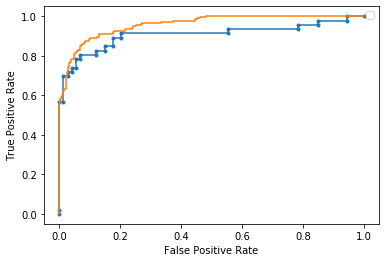

In [67]:
plt.plot(ABC_test_fpr,ABC_test_tpr,marker='.')
plt.plot(ABC_train_fpr,ABC_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show

In [68]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[69,  5],
       [ 9, 37]], dtype=int64)

In [69]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [70]:
DTC=DTC(max_depth=3)
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
train_pred=DTC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm=confusion_matrix(y_test,y_pred)
cm

0.8666666666666667


array([[70,  4],
       [12, 34]], dtype=int64)

In [71]:
dtc_test_auc=roc_auc_score(y_test,y_pred)
dtc_train_auc=roc_auc_score(y_train,train_pred)
dtc_test_auc,dtc_train_auc

(0.8425381903642772, 0.7913426210858091)

In [72]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
train_pred=GNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
cm=confusion_matrix(y_test,y_pred)
cm

0.8083333333333333 0.7478991596638656


array([[60, 14],
       [ 9, 37]], dtype=int64)

In [73]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
y_pred=BNB.predict(x_test)
train_pred=BNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
cm=confusion_matrix(y_test,y_pred)
cm

0.7666666666666667 0.7331932773109243


array([[60, 14],
       [14, 32]], dtype=int64)

In [74]:
from sklearn.externals import joblib
joblib.dump(ABC,'adaboost_classifier.pkl')


['adaboost_classifier.pkl']

In [75]:
load=joblib.load('adaboost_classifier.pkl')